Analyzes results from the runtime of different MDL algo

In [1]:
import os
import json
import matplotlib.pyplot as plt
import seaborn
import random
import numpy as np
import pandas as pd
import datetime
import collections

In [2]:
%matplotlib inline

In [3]:
# We set up the experiments in here and save it in the right place
now = datetime.datetime.now()
expe_dir_name = "./experiments/" + "runtime_mdl_comparison_results_" + \
           str(now.year) + "_" + str(now.month) + "_" + str(now.day) + "_" + str(now.hour) + "_" + str(now.minute)
if not os.path.exists(expe_dir_name):
    os.makedirs(expe_dir_name)

results_dir = os.path.join(expe_dir_name, "results")
if not os.path.exists(results_dir):
    os.makedirs(results_dir)

expe_params = {}
expe_params["expe_dir"] = r"C:\Users\cgautrai\workspace\repo_these\experiments\2018_06_25_16_59"

expe_params_file = os.path.join(expe_dir_name, "expe_params.txt")
with open(expe_params_file, "w") as f:
    json.dump(expe_params, f)

In [4]:
runtime_res = []
for d in os.scandir(os.path.join(expe_params["expe_dir"], "results")):
    if d.is_dir():
        with open(os.path.join(d.path, "results/expe_res_runtime.json")) as f:
            i=0
            for l in f:
                i+=1
                res = json.loads(l)
                runtime_res.append(res)
                # print(client_id + " " + str(i))

In [5]:
runtime_res_df = pd.DataFrame(runtime_res)

In [7]:
runtime_res_df.head()

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>algo</th>
      <th>beta</th>
      <th>clientId</th>
      <th>k</th>
      <th>mdl_cost</th>
      <th>model</th>
      <th>optimal_dp</th>
      <th>runtime</th>
      <th>signature</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>beam_search</td>
      <td>0.0</td>
      <td>210</td>
      <td>1.0</td>
      <td>9749.971780</td>
      <td>2_streams_uniform_uniform</td>
      <td>NaN</td>
      <td>7.117253</td>
      <td>{'blocs': [[0, 30], [31, 60], [61, 79], [80, 9...</td>
    </tr>
    <tr>
      <th>1</th>
      <td>beam_search</td>
      <td>0.0</td>
      <td>210</td>
      <td>5.0</td>
      <td>9706.333727</td>
      <td>2_streams_uniform_uniform</td>
      <td>NaN</td>
      <td>32.629674</td>
      <td>{'blocs': [[0, 44], [45, 56], [57, 74], [75, 9...</td>
    </tr>
    <tr>
      <th>2</th>
      <td>beam_search</td>
      <td>0.0</td>
      <td>210</td>
      <td>10.0</td>
      <td>9695.587334</td>
      <td>2_streams_uniform_uniform</td>
      <td>NaN</td>
      <td>64.391870</td>
      <td>{'blocs': [[0, 44], [45, 58], [59, 74], [75, 9...</td>
    </tr>
    <tr>
      <th>3</th>
      <td>beam_search</td>
      <td>0.0</td>
      <td>210</td>
      <td>20.0</td>
      <td>9687.432612</td>
      <td>2_streams_uniform_uniform</td>
      <td>NaN</td>
      <td>126.380111</td>
      <td>{'blocs': [[0, 31], [32, 51], [52, 79], [80, 9...</td>
    </tr>
    <tr>
      <th>4</th>
      <td>beam_search</td>
      <td>0.2</td>
      <td>210</td>
      <td>1.0</td>
      <td>9749.971780</td>
      <td>2_streams_uniform_uniform</td>
      <td>NaN</td>
      <td>7.067207</td>
      <td>{'blocs': [[0, 30], [31, 60], [61, 79], [80, 9...</td>
    </tr>
  </tbody>
</table>
</div>

In [6]:
runtime_res_df.fillna(-1, inplace=True)
runtime_res_df["sign_length"] = runtime_res_df["signature"].apply(lambda s: len(s["signature"]))
runtime_res_df["nb_segments"] = runtime_res_df["signature"].apply(lambda s: len(s["blocs"]))
runtime_res_df["nb_baskets"] = runtime_res_df["signature"].apply(lambda s: s["blocs"][-1][-1])
runtime_res_df["algo_name"] = runtime_res_df.apply(lambda r: r["algo"] + "_optimal=" + str(r["optimal_dp"]) if r["algo"]=="skyline" else r["algo"] + "_k=" + str(int(r["k"])) + "_beta=" + str(r["beta"]), axis=1)
runtime_res_df[["algo_name", "mdl_cost", "sign_length", "nb_segments", "runtime"]].groupby(["algo_name"]).mean()

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>mdl_cost</th>
      <th>sign_length</th>
      <th>nb_segments</th>
      <th>runtime</th>
    </tr>
    <tr>
      <th>algo_name</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>beam_search_k=10_beta=0.0</th>
      <td>4151.257144</td>
      <td>143.4410</td>
      <td>4.0945</td>
      <td>78.455026</td>
    </tr>
    <tr>
      <th>beam_search_k=10_beta=0.2</th>
      <td>4148.499836</td>
      <td>143.1720</td>
      <td>4.1745</td>
      <td>79.608732</td>
    </tr>
    <tr>
      <th>beam_search_k=10_beta=0.4</th>
      <td>4148.062141</td>
      <td>143.1755</td>
      <td>4.1850</td>
      <td>80.162600</td>
    </tr>
    <tr>
      <th>beam_search_k=10_beta=0.6</th>
      <td>4147.339653</td>
      <td>143.1095</td>
      <td>4.1250</td>
      <td>80.616498</td>
    </tr>
    <tr>
      <th>beam_search_k=1_beta=0.0</th>
      <td>4156.986932</td>
      <td>144.8240</td>
      <td>4.1480</td>
      <td>8.880243</td>
    </tr>
    <tr>
      <th>beam_search_k=1_beta=0.2</th>
      <td>4156.986932</td>
      <td>144.8240</td>
      <td>4.1480</td>
      <td>8.749385</td>
    </tr>
    <tr>
      <th>beam_search_k=1_beta=0.4</th>
      <td>4156.986932</td>
      <td>144.8240</td>
      <td>4.1480</td>
      <td>8.755968</td>
    </tr>
    <tr>
      <th>beam_search_k=1_beta=0.6</th>
      <td>4156.986932</td>
      <td>144.8240</td>
      <td>4.1480</td>
      <td>8.758572</td>
    </tr>
    <tr>
      <th>beam_search_k=20_beta=0.0</th>
      <td>4149.933044</td>
      <td>143.2895</td>
      <td>4.0660</td>
      <td>149.580100</td>
    </tr>
    <tr>
      <th>beam_search_k=20_beta=0.2</th>
      <td>4146.885956</td>
      <td>143.0475</td>
      <td>4.1965</td>
      <td>153.582383</td>
    </tr>
    <tr>
      <th>beam_search_k=20_beta=0.4</th>
      <td>4146.619688</td>
      <td>143.0450</td>
      <td>4.1340</td>
      <td>155.225896</td>
    </tr>
    <tr>
      <th>beam_search_k=20_beta=0.6</th>
      <td>4146.179215</td>
      <td>143.0465</td>
      <td>4.1570</td>
      <td>157.345931</td>
    </tr>
    <tr>
      <th>beam_search_k=5_beta=0.0</th>
      <td>4152.838235</td>
      <td>143.8665</td>
      <td>4.1010</td>
      <td>40.610798</td>
    </tr>
    <tr>
      <th>beam_search_k=5_beta=0.2</th>
      <td>4150.018589</td>
      <td>143.3985</td>
      <td>4.1645</td>
      <td>40.855382</td>
    </tr>
    <tr>
      <th>beam_search_k=5_beta=0.4</th>
      <td>4149.567293</td>
      <td>143.2435</td>
      <td>4.1900</td>
      <td>41.049812</td>
    </tr>
    <tr>
      <th>beam_search_k=5_beta=0.6</th>
      <td>4149.777731</td>
      <td>143.3140</td>
      <td>4.1985</td>
      <td>41.225991</td>
    </tr>
    <tr>
      <th>skyline_optimal=False</th>
      <td>4150.797615</td>
      <td>143.6680</td>
      <td>4.3050</td>
      <td>1.806474</td>
    </tr>
    <tr>
      <th>skyline_optimal=True</th>
      <td>4144.489673</td>
      <td>142.9655</td>
      <td>4.2915</td>
      <td>16.549353</td>
    </tr>
  </tbody>
</table>
</div>

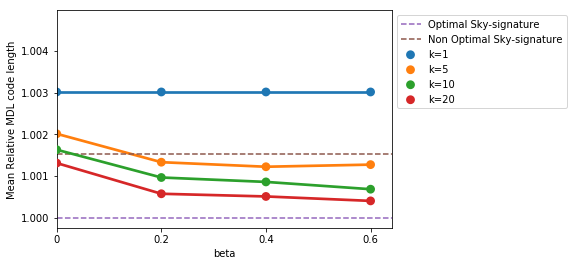

In [62]:
mean_res_df = runtime_res_df[["algo_name", "mdl_cost", "beta", "optimal_dp", "k"]].groupby(["algo_name"]).mean().reset_index()
norm_value = mean_res_df[mean_res_df["algo_name"]=="skyline_optimal=True"]["mdl_cost"].tolist()[0]
mean_res_df["norm_mdl_cost"] = mean_res_df["mdl_cost"]/norm_value
g = seaborn.pointplot("beta", "norm_mdl_cost", "k", data=mean_res_df[mean_res_df["k"] > 0])
g.set(xticklabels=["0", "0.2", "0.4", "0.6"])
g.set(xlim=[0, 3.2])
palette = seaborn.color_palette()
l1 = plt.axhline(label="Optimal skyline", y=mean_res_df[mean_res_df["algo_name"]=="skyline_optimal=True"]["mdl_cost"].tolist()[0]/norm_value, linestyle="--", color=palette[4])
l2 = plt.axhline(label="Non Optimal skyline", y=mean_res_df[mean_res_df["algo_name"]=="skyline_optimal=False"]["mdl_cost"].tolist()[0]/norm_value, linestyle="--", color=palette[5])
l = g.get_legend_handles_labels()
plt.ylabel("Mean Relative MDL code length")
lgd = plt.legend(handles=[li for li in l[0]], labels=["Optimal Sky-signature", "Non Optimal Sky-signature", "k=1", "k=5", "k=10", "k=20"], bbox_to_anchor=(1, 1), loc=2)
plt.savefig(os.path.join(results_dir, "mean_encoding_cost.pdf"), bbox_extra_artists=(lgd,), bbox_inches='tight')

4150

In [19]:
runtime_res_df["nb_segments"].plot.box(logy=True)

In [18]:
runtime_res_df_uniform = runtime_res_df[runtime_res_df["model"]=="2_streams_uniform_uniform"]
runtime_res_df_prequential = runtime_res_df[runtime_res_df["model"]=="2_streams_prequential_prequential"]

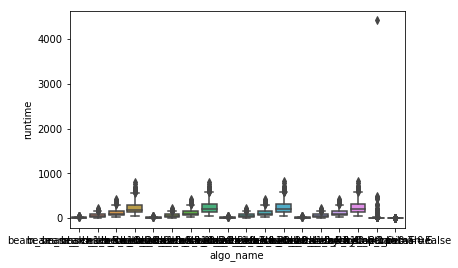

In [59]:
study_df = runtime_res_df_prequential
seaborn.boxplot(x="algo_name", y="runtime", data=study_df)
# plt.ylim([0, 1000])

In [60]:
print(study_df[["algo", "k", "beta", "optimal_dp", "mdl_cost", "runtime"]].groupby(["algo", "k", "beta", "optimal_dp"]).mean().to_latex())

\begin{tabular}{llllrr}
\toprule
            &       &      &    &     mdl\_cost &     runtime \\
algo & k & beta & optimal\_dp &              &             \\
\midrule
beam\_search &  1.0  &  0.0 & -1 &  3812.842843 &   13.432312 \\
            &       &  0.2 & -1 &  3812.842843 &   13.267896 \\
            &       &  0.4 & -1 &  3812.842843 &   13.274490 \\
            &       &  0.6 & -1 &  3812.842843 &   13.283117 \\
            &  5.0  &  0.0 & -1 &  3810.342723 &   61.770597 \\
            &       &  0.2 & -1 &  3807.932167 &   62.078173 \\
            &       &  0.4 & -1 &  3807.018915 &   62.314826 \\
            &       &  0.6 & -1 &  3807.443038 &   62.516523 \\
            &  10.0 &  0.0 & -1 &  3809.366852 &  118.745959 \\
            &       &  0.2 & -1 &  3806.697500 &  120.456858 \\
            &       &  0.4 & -1 &  3806.490696 &  121.101616 \\
            &       &  0.6 & -1 &  3804.930896 &  121.702537 \\
            &  20.0 &  0.0 & -1 &  3808.473899 &  224.879291 \

In [61]:
study_df[["algo_name", "mdl_cost", "sign_length", "nb_segments", "runtime"]].groupby(["algo_name"]).mean()

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>mdl_cost</th>
      <th>sign_length</th>
      <th>nb_segments</th>
      <th>runtime</th>
    </tr>
    <tr>
      <th>algo_name</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>beam_search_k=10_beta=0.0</th>
      <td>3809.366852</td>
      <td>162.368</td>
      <td>3.251</td>
      <td>118.745959</td>
    </tr>
    <tr>
      <th>beam_search_k=10_beta=0.2</th>
      <td>3806.697500</td>
      <td>162.060</td>
      <td>3.371</td>
      <td>120.456858</td>
    </tr>
    <tr>
      <th>beam_search_k=10_beta=0.4</th>
      <td>3806.490696</td>
      <td>162.104</td>
      <td>3.416</td>
      <td>121.101616</td>
    </tr>
    <tr>
      <th>beam_search_k=10_beta=0.6</th>
      <td>3804.930896</td>
      <td>161.995</td>
      <td>3.297</td>
      <td>121.702537</td>
    </tr>
    <tr>
      <th>beam_search_k=1_beta=0.0</th>
      <td>3812.842843</td>
      <td>163.856</td>
      <td>3.281</td>
      <td>13.432312</td>
    </tr>
    <tr>
      <th>beam_search_k=1_beta=0.2</th>
      <td>3812.842843</td>
      <td>163.856</td>
      <td>3.281</td>
      <td>13.267896</td>
    </tr>
    <tr>
      <th>beam_search_k=1_beta=0.4</th>
      <td>3812.842843</td>
      <td>163.856</td>
      <td>3.281</td>
      <td>13.274490</td>
    </tr>
    <tr>
      <th>beam_search_k=1_beta=0.6</th>
      <td>3812.842843</td>
      <td>163.856</td>
      <td>3.281</td>
      <td>13.283117</td>
    </tr>
    <tr>
      <th>beam_search_k=20_beta=0.0</th>
      <td>3808.473899</td>
      <td>162.147</td>
      <td>3.220</td>
      <td>224.879291</td>
    </tr>
    <tr>
      <th>beam_search_k=20_beta=0.2</th>
      <td>3805.426778</td>
      <td>161.900</td>
      <td>3.422</td>
      <td>230.785510</td>
    </tr>
    <tr>
      <th>beam_search_k=20_beta=0.4</th>
      <td>3804.990808</td>
      <td>161.905</td>
      <td>3.310</td>
      <td>232.942956</td>
    </tr>
    <tr>
      <th>beam_search_k=20_beta=0.6</th>
      <td>3804.201805</td>
      <td>161.921</td>
      <td>3.343</td>
      <td>235.958333</td>
    </tr>
    <tr>
      <th>beam_search_k=5_beta=0.0</th>
      <td>3810.342723</td>
      <td>162.767</td>
      <td>3.267</td>
      <td>61.770597</td>
    </tr>
    <tr>
      <th>beam_search_k=5_beta=0.2</th>
      <td>3807.932167</td>
      <td>162.235</td>
      <td>3.396</td>
      <td>62.078173</td>
    </tr>
    <tr>
      <th>beam_search_k=5_beta=0.4</th>
      <td>3807.018915</td>
      <td>162.154</td>
      <td>3.414</td>
      <td>62.314826</td>
    </tr>
    <tr>
      <th>beam_search_k=5_beta=0.6</th>
      <td>3807.443038</td>
      <td>162.150</td>
      <td>3.444</td>
      <td>62.516523</td>
    </tr>
    <tr>
      <th>skyline_optimal=False</th>
      <td>3803.713233</td>
      <td>162.265</td>
      <td>3.590</td>
      <td>1.859156</td>
    </tr>
    <tr>
      <th>skyline_optimal=True</th>
      <td>3800.951416</td>
      <td>161.642</td>
      <td>3.589</td>
      <td>16.464213</td>
    </tr>
  </tbody>
</table>
</div>

In [62]:
empty_model_res_df = pd.read_csv(r"C:\Users\cgautrai\workspace\repo_these\experiments\runtime_mdl_empty_model_results_2018_6_26_9_50\results\empty_model_results.csv")

In [63]:
empty_model_res_df.rename(columns={"mdl_cost":"mdl_cost_empty"}, inplace=True)

In [64]:
study_df_empty_model = study_df.merge(empty_model_res_df, on=["clientId", "model"])

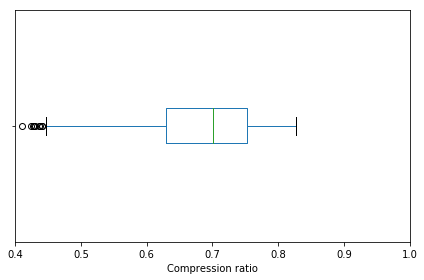

In [65]:
study_df_empty_model["mdl_difference"] = study_df_empty_model["mdl_cost_empty"]-study_df_empty_model["mdl_cost"]
study_df_empty_model["mdl_difference_rel"] = study_df_empty_model["mdl_cost"]/study_df_empty_model["mdl_cost_empty"]
encoding_diff_df = study_df_empty_model[["clientId", "mdl_difference", "mdl_difference_rel"]].groupby("clientId").max().reset_index()
encoding_diff_df["mdl_difference_rel"].plot.box(label="", vert=False)
plt.xlabel("Compression ratio")
plt.xlim([0.4, 1])
plt.tight_layout()
plt.savefig(os.path.join(results_dir, "compression_ratio_empty_model.pdf"))